In [53]:
import csv
import json
import pandas as pd
import numpy as np
import sys
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.naive_bayes import BernoulliNB as nb1
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
#Loading data
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [55]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [56]:
#Number of Dishes in Training Data

In [57]:
len(train['id'].value_counts())

39774

In [58]:
 #Number of Cuisines

In [59]:
cuisine = train['cuisine'].value_counts()
len(cuisine) 

20

In [60]:
#Types of Cuisines

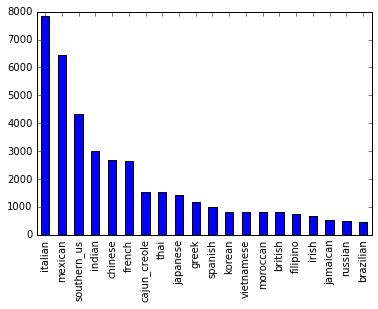

In [61]:
cuisine.plot(kind= 'bar')

In [74]:
ingredients = set() 
cuisines = set() 
train_id = list()  
test_id = list()  

In [75]:
tfile = open('train.json')
tdata = json.load(tfile)
tfile.close()

In [76]:
test = open('test.json')
testdata = json.load(test)
test.close()

In [77]:
#Segregating relevant data into correponding datasets.
for recipe in tdata:
    train_id.append(recipe['id'])
    cuisines.add(recipe['cuisine'])
    for elems in recipe['ingredients']:
        ingredients.add(elems)

In [78]:
len(train_id)

39774

In [79]:
len(ingredients) #Number of Unique Ingredients in  Training  Data

6714

In [80]:
len(cuisines) #Number of Cuisines in Training Data

20

In [81]:
#Adding unique test data elements to ingredients set.
for recipe in testdata:
    for elems in recipe['ingredients']:
        ingredients.add(elems)

In [82]:
len(ingredients) #Number of Unique Ingredients in  combined Testing and Training  Data

7137

In [83]:
#Represent Each Dish by a binary ingredient feature vector
cuisines = list(cuisines)
cuisines = dict([(cuisine, i) for i, cuisine in enumerate(cuisines)])
ingredients = list(ingredients)
ingredients = dict([(ingredient, i) for i, ingredient in enumerate(ingredients)])

In [84]:
X = []
Y = []

In [85]:
for recipe in tdata:
    inglist = [0 for x in range(len(ingredients))]
    for ingredient in recipe['ingredients']:
        pos = ingredients[ingredient]
        inglist[pos] = 1.0
    X.append(inglist)
    
    cuisinepos = cuisines[recipe['cuisine']]
    Y.append(cuisinepos)

In [90]:
X_test = []
for recipe in testdata:
    inglist = [0 for x in range(len(ingredients))]
    for ingredient in recipe['ingredients']:
        pos = ingredients[ingredient]
        inglist[pos] = 1.0
    X_test.append(inglist)

In [21]:
#Binary Ingredient Feature Vector (n X d)
len(X) 


39774

In [24]:
len(X[0])

6714

In [22]:
len(ingredients)
    

6714

In [23]:
len(Y) # List of all recipes as per their cuisine number

39774

In [130]:
len(X_test) #Binary Ingredient Feature Vector (n X d) in Testing Data

9944

In [94]:
len(X_test[0]) #Number of ingredients have increased from 6714 to 7137 because Test Data has more ingredients

7137

In [95]:
Xa = np.array(X)

In [96]:
Ya = np.array(Y)

In [97]:
Xa_test = np.array(X_test)

In [26]:
# Using Naïve Bayes Classifier to perform 3 fold cross-validation on the training set and report your average classification accuracy

In [98]:
Ya

array([ 9, 17,  3, ...,  0,  2,  1])

In [107]:
#Setting up environment for 3-Fold Cross Validation
from sklearn import cross_validation
all_folds = cross_validation.KFold(len(Xa), n_folds=3)
print("Genrated Folds")
for i in all_folds:
    train,test=i
    print("%s %s" % (train, test))

Genrated Folds
[13258 13259 13260 ..., 39771 39772 39773] [    0     1     2 ..., 13255 13256 13257]
[    0     1     2 ..., 39771 39772 39773] [13258 13259 13260 ..., 26513 26514 26515]
[    0     1     2 ..., 26513 26514 26515] [26516 26517 26518 ..., 39771 39772 39773]


In [100]:
#Gaussian Prior Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = []
for i in all_folds:
    train,test=i
    result.append(clf.fit(Xa[train],Ya[train]).score(Xa[test],Ya[test]))

In [101]:
print("The accuracy of each fold is: ")
print(result)
print("The average accuracy of Gaussian Naive Bayes classifier is: ")
print(sum(result) / float(len(result)))

The accuracy of each fold is: 
[0.37901644290239855, 0.38293860310755767, 0.37758334590435966]
The average accuracy of Gaussian Naive Bayes classifier is: 
0.379846130638


In [102]:
#Bernoulli Prior Naive Bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
result_Bernoulli = []
for i in all_folds:
    train,test=i
    result_Bernoulli.append(clf.fit(Xa[train],Ya[train]).score(Xa[test],Ya[test]))

In [104]:
print("The accuracy of each fold is: ")
print(result_Bernoulli)
print("The average accuracy of Bernoulli Naive Bayes classifier is: ")
print(sum(result_Bernoulli) / float(len(result_Bernoulli)))

The accuracy of each fold is: 
[0.67860914165032438, 0.67430985065620752, 0.68139990948861062]
The average accuracy of Bernoulli Naive Bayes classifier is: 
0.678106300598


In [105]:
#Logistic Regression using 3-Fold Cross Validation
from sklearn import linear_model
result_Logistic = []
cls = linear_model.LogisticRegression()
for i in all_folds:
    train,test=i
    result_Logistic.append(cls.fit(Xa[train], Ya[train]).score(Xa[test], Ya[test]))

In [106]:
print("The accuracy of each fold is: ")
print(result_Logistic)
print("The average accuracy of Logistic Regression classifier is: ")
print(sum(result_Logistic) / float(len(result)))

The accuracy of each fold is: 
[0.77583345904359635, 0.77213757731181176, 0.77869965303967414]
The average accuracy of Logistic Regression classifier is: 
0.775556896465


In [50]:
#Since our best accuracy was obtained with Logistic Regression, we'll train all data using it.

In [108]:
final_result = []
cfr = linear_model.LogisticRegression()
final_result = cfr.fit(Xa,Ya).score(Xa,Ya)

In [109]:
print("The accuracy of Logistic Regression on entire training data is: ")
print(final_result)

The accuracy of Logistic Regression on entire training data is: 
0.868331070549


In [110]:
#Using classifier to predict cuisines in Testing Data
result_test = []
result_test = cfr.predict(Xa_test)

In [124]:
result_test

[u'british',
 u'southern_us',
 u'italian',
 u'cajun_creole',
 u'italian',
 u'southern_us',
 u'spanish',
 u'chinese',
 u'mexican',
 u'british',
 u'italian',
 u'greek',
 u'indian',
 u'italian',
 u'southern_us',
 u'french',
 u'mexican',
 u'southern_us',
 u'mexican',
 u'southern_us',
 u'japanese',
 u'indian',
 u'spanish',
 u'vietnamese',
 u'italian',
 u'southern_us',
 u'vietnamese',
 u'korean',
 u'italian',
 u'italian',
 u'mexican',
 u'thai',
 u'mexican',
 u'japanese',
 u'chinese',
 u'mexican',
 u'russian',
 u'indian',
 u'indian',
 u'cajun_creole',
 u'cajun_creole',
 u'chinese',
 u'french',
 u'mexican',
 u'italian',
 u'italian',
 u'spanish',
 u'russian',
 u'vietnamese',
 u'chinese',
 u'italian',
 u'thai',
 u'indian',
 u'italian',
 u'italian',
 u'chinese',
 u'italian',
 u'japanese',
 u'chinese',
 u'cajun_creole',
 u'french',
 u'mexican',
 u'filipino',
 u'korean',
 u'mexican',
 u'greek',
 u'mexican',
 u'thai',
 u'italian',
 u'italian',
 u'italian',
 u'indian',
 u'thai',
 u'brazilian',
 u'ind

In [125]:
# Generating Submission File
num_to_cuisine = {val: key for key, val in cuisines.items()}
result_test = [num_to_cuisine[x] for x in result_test]



KeyError: u'british'

In [133]:
# write results to file
out_nb = open('test.csv','w')
out_nb.write('id,cuisine\n')

for x in range(len(testdata)):
    out_nb.write(str(testdata[x]['id']) + ',' + result_test[x] + '\n')
out_nb.close()